<a href="https://colab.research.google.com/github/faris-octa/Deep-Learning-with-Keras/blob/master/eda_peopleanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
os. getcwd()

'/content'

In [7]:
import os
for dirname, _, filenames in os.walk('/home'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/feature_analysis.csv


In [ ]:
#invite everyone for the Kaggle party
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 4]

import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
#bring in the six packs
train = pd.read_csv('/content/peopleAnalyticsData/train.csv')
test = pd.read_csv('/content/peopleAnalyticsData/test.csv')
feature_analysis = pd.read_csv('/home/feature_analysis.csv').drop('kesimpulan', axis=1).set_index('variabel')

FileNotFoundError: ignored

In [ ]:
X = train.drop('Best Performance', axis=1)
y = train['Best Performance']

# 1. Dataset overview

In [ ]:
#check the decoration
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

In [ ]:
train.describe() # Untuk melihat statistik data

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,18502.000000,19950.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,15716.000000,15703.000000,15703.000000
mean,1.733252,1.555544,1.088203,1987.398682,0.746239,0.379232,0.366917,2.994603,4.872481,4.546876,2.889571,2.832265,0.818723,2.794138,0.898069,0.121245,66.344676,71.420847,0.682991
std,1.422136,0.954620,0.839882,4.274737,0.840026,0.606961,0.597422,11.699025,4.500514,4.519389,2.193424,1.751125,2.250188,2.822423,2.848540,0.326419,23.253675,24.095520,1.107861
min,0.000000,0.000000,0.000000,1963.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000
25%,1.170000,1.080000,0.500000,1986.000000,0.000000,0.000000,0.000000,2.810000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,51.675000,55.935000,0.000000
50%,1.580000,1.500000,0.830000,1988.000000,1.000000,0.000000,0.000000,3.090000,4.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,66.310833,71.410000,0.000000
75%,1.920000,1.830000,1.500000,1990.000000,1.000000,1.000000,1.000000,3.300000,6.000000,5.000000,3.000000,3.000000,0.000000,5.000000,1.000000,0.000000,81.930833,88.350000,1.000000
max,8.750000,8.000000,7.500000,2017.000000,7.000000,4.000000,4.000000,381.000000,34.000000,35.000000,22.000000,15.000000,54.000000,41.000000,132.000000,1.000000,129.010000,130.000000,3.000000


In [ ]:
feature_analysis

,deskripsi,tipe,segmen,ekspektasi,keterangan tambahan
variabel,,,,,
job_level,Level Jabatan Pekerja,categorical,work_info,high,"di testds, gaada nilai JG06"
job_duration_in_current_job_level,Masa Kerja pada job level saat ini,numerical,work_info,high,NaN
person_level,Level personal Pekerja,categorical,work_info,high,"di testds, gaada nilai PG08"
job_duration_in_current_person_level,Masa Kerja pada person level saat ini,numerical,work_info,high,NaN
job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini,numerical,work_info,medium,NaN
Employee_type,"Tipe Pekerja ( 3 tipe Relationship Manager, ti...",categorical,work_info,high,NaN
Employee_status,Status Pekerja (tetap/kontrak),categorical,work_info,high,"di testds, nilainya permanent semua"
gender,Jenis Kelamin,categorical,personal_info,medium,NaN
age,Tahun Lahir,numerical,personal_info,medium,mesti diganti formatnya


## 2. Analisis target "Best Performance"

[0 1]


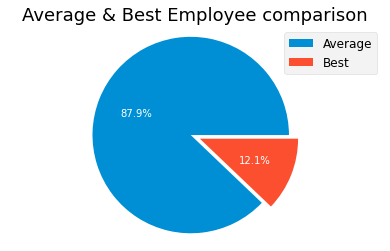

In [ ]:
#descriptive statistics summary
print(train['Best Performance'].unique())

#histogram
best_performance_comparison = train['Best Performance'].value_counts()

plt.pie(best_performance_comparison.values,
        labels=best_performance_comparison.index,
        autopct='%.1f%%',
        textprops={'fontsize': 10, 'color': 'white'},
        labeldistance=None,
        explode=(0.1, 0)
       )
plt.title('Average & Best Employee comparison', fontsize=18)
plt.legend(['Average', 'Best'], fontsize=12)
plt.axis('equal')
plt.show()

**dari pie chart, kita tau kalo datasetnya gak balance**

# 3. Relationship target dengan prediktor

## dengan numerical features

In [ ]:
#scatter plot job_duration_in_current_job_level/saleprice
var = 'Avg_achievement_%'
data = pd.concat([train['Best Performance'], train[var]], axis=1)
data.plot.scatter(x=var, y='Best Performance', figsize=(20,5))

## dengan categorical features

**hubungan target dengan feature Employee_status**

In [ ]:
axes = sns.countplot(train['Employee_status'], hue=train['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Employee_status', fontsize=12, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=10, xytext=(0, 12), textcoords='offset points')

axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18)
plt.tight_layout()
plt.show()

print(test['Employee_status'].unique())

employee yang statusnya "contract" gaada yang masuk kategori Best Performance. Di test dataset juga isi nilainya 'permanent' semua, jadi feature ini bisa di-drop.

In [ ]:
feature_analysis.loc['Employee_status']['keterangan tambahan'] = "drop kolom"

**hubungan target dengan feature job_level**

In [ ]:
axes = sns.countplot(train['job_level'], hue=train['Best Performance'], palette=['#d96548', 'dodgerblue'])
axes.set_title('Performance base on Employee_status', fontsize=12, pad=18)

for val in axes.patches:
    pct = '{:.2f}%'.format(100 * val.get_height() / train.shape[0])
    xpos = val.get_x() + val.get_width() / 2.
    ypos = val.get_height()
    axes.annotate(pct, (xpos, ypos), ha='center', va='center', fontsize=10, xytext=(0, 12), textcoords='offset points')

axes.set_xlabel(None)

plt.legend(['Average', 'Best'], fontsize=18)
plt.tight_layout()
plt.show()

print(test['job_level'].unique())

In [ ]:
train.loc[train['job_level'] == "JG06"]

In [ ]:
train[['Avg_achievement_%', 'Last_achievement_%', 'Best Performance']]

In [ ]:
train.loc[train['Best Performance'] == 1][['achievement_target_1', 'achievement_target_2', 'achievement_target_3' ,'Best Performance']]

,achievement_target_1,achievement_target_2,achievement_target_3,Best Performance
4,achiev_< 50%,achiev_> 1.5,not_reached,1
5,achiev_100%-150%,achiev_< 50%,reached,1
6,achiev_50%-100%,achiev_< 50%,reached,1
12,achiev_50%-100%,achiev_< 50%,not_reached,1
14,achiev_50%-100%,achiev_> 1.5,not_reached,1
16,achiev_> 1.5,achiev_50%-100%,not_reached,1
19,achiev_< 50%,achiev_< 50%,reached,1
20,achiev_50%-100%,achiev_100%-150%,reached,1
28,achiev_50%-100%,achiev_50%-100%,reached,1
31,achiev_100%-150%,achiev_< 50%,reached,1


**sepertinya achievement_target_X kurang bisa mewakili Best Performance**

# 4. Dive deeper

In [ ]:
# unique value di setiap feature

nunique = train.nunique(dropna=False)
print(nunique)

In [ ]:
train['Achievement_above_100%_during3quartal'].value_counts()

0.0    10677
3.0     2237
1.0     1564
2.0     1225
Name: Achievement_above_100%_during3quartal, dtype: int64

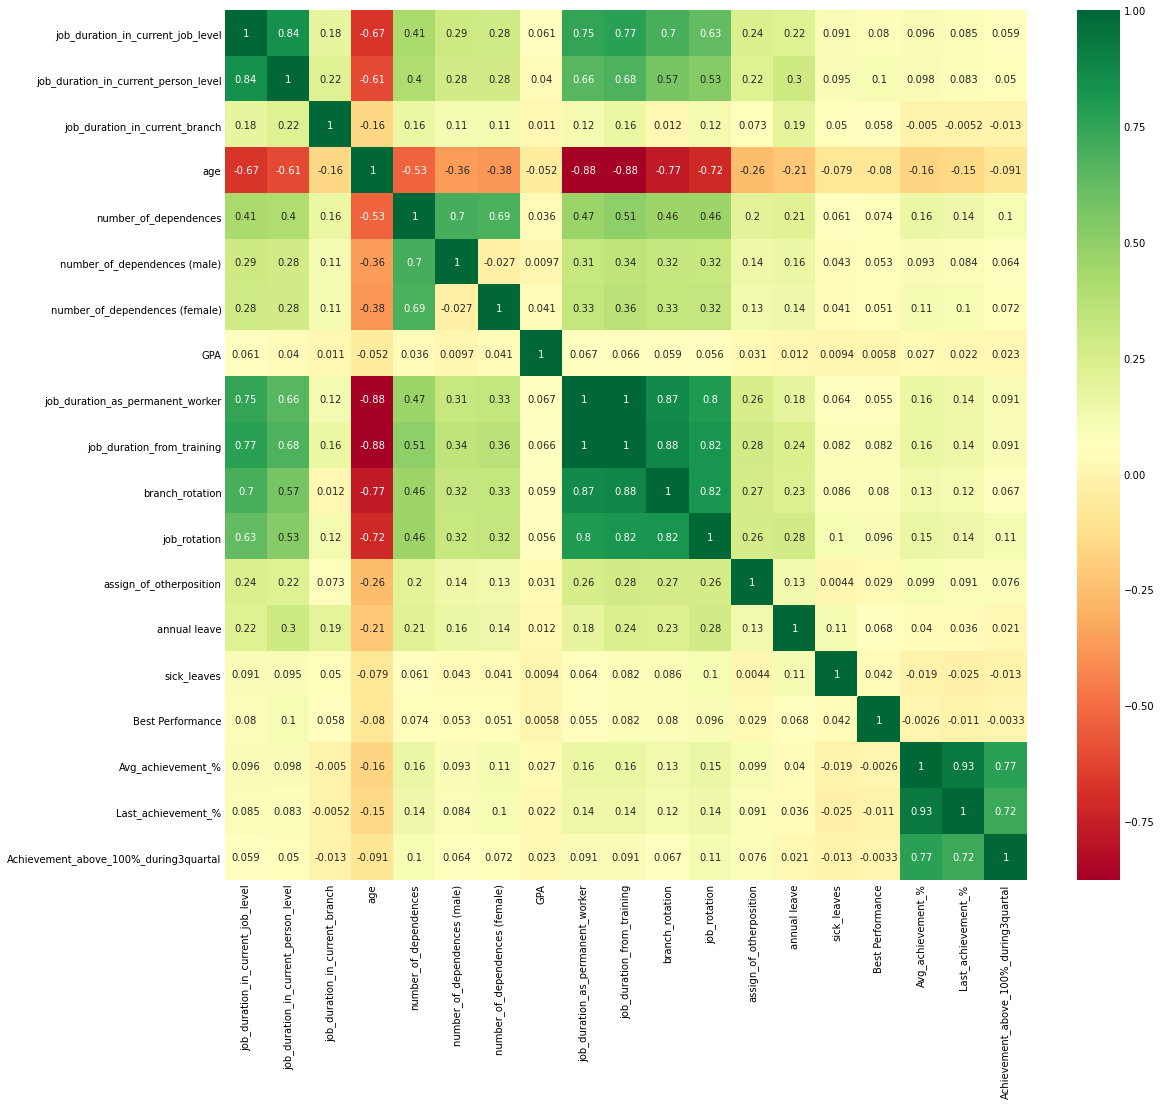

In [ ]:
#correlation matrix
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16, 16))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

## cari yang multicollinear

job_duration_as_permanent_worker multikolinear dengan job_duration_from_training

# 5. Missing values

In [ ]:
#missing data

null_col = train.columns[train.isnull().any()]
null_df = train[null_col].isna().sum().rename('missing rows').to_frame()
null_df['percentage'] = round(null_df['missing rows'] / train.shape[0] * 100, 2)
null_df['percentage'] = null_df['percentage'].astype('str')
null_df.sort_values('missing rows', ascending=False).style.background_gradient('Blues')

**kolom yang berhubungan sama achievement ekspektasinya penting, tapi banyak bgt missing valuenya**

In [ ]:
train.fillna('NaN', inplace=True)

train_enc =  pd.DataFrame(index = train.index)

for col in tqdm_notebook(train.columns):
    train_enc[col] = train[col].factorize()[0]
    
dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1
            
print(dup_cols)

**gaada duplicate kolom, good**

# 6. Pencilan

In [ ]:
# ada nilai ipk yang mesti dibagi 100
# GPA 0 apakah sama dengan null ????
df_train[['Education_level', 'GPA']].loc[df_train.Education_level == 'level_2'].sort_values(by='GPA', ascending=False)

In [ ]:
submission = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/sample_submission.csv')
submission.sum()

In [ ]:
import re

def remove_redundant_feat_1(text):
    
    text = re.sub(r'achiev_< 50%', 'Pencapaian < 50%', text)
    text = re.sub(r'achiev_50%-100%', 'Pencapaian 50%-100%', text)
    text = re.sub(r'achiev_100%-150%', 'Pencapaian 100%-150%', text)
    text = re.sub(r'achiev_> 1.5', 'Pencapaian > 1.5', text)
    
    return text
    

# train_df['achievement_target_1'] = train_df['achievement_target_1'].apply(remove_redundant_feat)
# train_df['achievement_target_2'] = train_df['achievement_target_2'].apply(remove_redundant_feat)
# train_df['achievement_target_3'] = train_df['achievement_target_3'].apply(lambda x: re.sub(r'not_reached', 'not reached', x))

# test_df['achievement_target_1'] = test_df['achievement_target_1'].apply(remove_redundant_feat)
# test_df['achievement_target_2'] = test_df['achievement_target_2'].apply(remove_redundant_feat)
# test_df['achievement_target_3'] = test_df['achievement_target_3'].apply(lambda x: re.sub(r'not_reached', 'not reached', x))